# 2.8 Pattern Matching mit endlichen Automaten

In [20]:
import sys
from jove.Def_DFA import *
import jove.lex
sys.modules['lex'] = jove.lex
import jove.yacc
sys.modules['yacc'] = jove.yacc
from jove.Def_md2mc import *
from jove.DotBashers import *
from jove.LangDef import *

Die Präfixe eines Worts:

In [2]:
m = 'bla'
[m[:l] for l in range(len(m)+1)]

['', 'b', 'bl', 'bla']

In [3]:
def ell(m,u):
    for i in range(len(m),0,-1):
        pr = m[:i]
        if u.endswith(pr):
            return pr
    return ''

In [4]:
ell('bla','baaaablabla')

'bla'

In [5]:
Q = {m[:l] for l in range(len(m)+1)} 
Sigma = {s for s in m}
Delta = {(pr,s): ell(m,pr+s) for pr in [m[:l] for l in range(len(m))] for s in Sigma}
Delta.update({(m,s): m for s in Sigma})
q0 = ''
F = {m}

In [6]:
def PM(m,alphabet=''):
    Q = {m[:l] for l in range(len(m)+1)}
    if alphabet=='':
        alphabet = m
    Sigma = {s for s in alphabet}
    Delta = {(pr,s): ell(m,pr+s) for pr in [m[:l] for l in range(len(m))] for s in Sigma}
    Delta.update({(m,s): m for s in Sigma})
    q0 = ''
    F = {m}
    return {'Q': Q, 'Sigma': Sigma, 'Delta': Delta, 'q0': q0, 'F': F}

In [17]:
PM('blabla')

{'Q': {'', 'b', 'bl', 'bla', 'blab', 'blabl', 'blabla'},
 'Sigma': {'a', 'b', 'l'},
 'Delta': {('', 'a'): '',
  ('', 'b'): 'b',
  ('', 'l'): '',
  ('b', 'a'): '',
  ('b', 'b'): 'b',
  ('b', 'l'): 'bl',
  ('bl', 'a'): 'bla',
  ('bl', 'b'): 'b',
  ('bl', 'l'): '',
  ('bla', 'a'): '',
  ('bla', 'b'): 'blab',
  ('bla', 'l'): '',
  ('blab', 'a'): '',
  ('blab', 'b'): 'b',
  ('blab', 'l'): 'blabl',
  ('blabl', 'a'): 'blabla',
  ('blabl', 'b'): 'b',
  ('blabl', 'l'): '',
  ('blabla', 'a'): 'blabla',
  ('blabla', 'b'): 'blabla',
  ('blabla', 'l'): 'blabla'},
 'q0': '',
 'F': {'blabla'}}

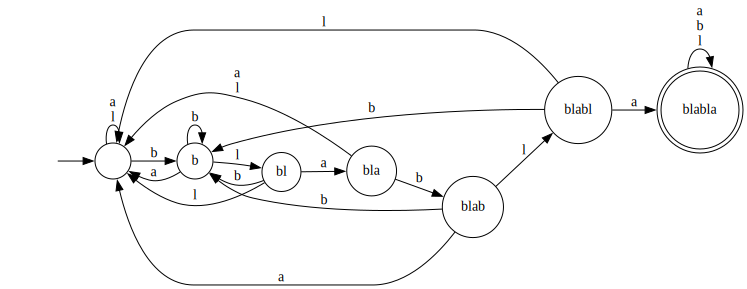

In [18]:
dotObj_dfa(PM('blabla'),FuseEdges=True)